<a href="https://colab.research.google.com/github/buttersaltpepper/Financial-Data-Analytics/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression with Python**
## **1. Probability of Default**
## **2. Credit Card Classifier**
## **3. Titanic Survival**
## **4. Advertisment Click**


Learning resources:

* Machine Learning in finance 2021 by Prof. Pedram Jahangiry, Huntsman School of Business, Utah State University.

* Data Science for Everyone, Markum Reed

* Datacamp

* StatQuest with Josh Starmer

* Kristoffer Magnusson, PhD, Lic. Clinical Psychologist




# **Notes**
* Target variables are classes
* so outputs are probability
* then classify probabilities using a threshold
* Example: Probability of default:
  * 1 default, 0 no default
  * threshold 0.5
  * above 0.5 means default
  * below 0.5 menas non-default
* Qualitative Variables (the target) can be either nominal or ordinal
* **Classifies based on threshold we define**



---
🙂 **EXAMPLES:**
  * Is the bond junk or high grade? Knowing this helps in reblaancing portfolio
  * Loan application (approved or denied)
  * Credit card default
  * Card insurance (high risk, medium, low risk) - to charge higher or lower premium on the insurance


---





🙂**PERFORMANCE METRICS**

  a. accuracy

  b. preicision,

  c. recall

  d. F1 score,

  e ROC and AUC



 


---

🙂**LINEAR PROBABILITY MODEL VS LOGISTIC REGRESSION**
**Whats wrong with Linear Probability Model (LPM)?**

$y = Beta_0 + Beta_1bal+e$ where, Y = 1 for default and 0 otherwise


**Expected value of Y, given balance**
**Because 0 cancels out, so it becomes,**
$E(Y = 1|bal)$

This is the probability of default (y=1) given bal

Then the simple regression = $P(x) = Beta_0 + Beta_1bal$


But this simple regression leads to:
* Negative numbers (negative y-intercept)
* Variance depends on x
* so hetersocedascity

**Need to transform the regression**

Sigmoid Function - monotone mapping function that has range of [0,1]


So the linear model becomes:
$p = \frac{1}{1+e^-(b_0 + b_1x}$


---

🙂 **LOGISTIC REGRESSION**
After transformation, the model is:

$f_w,_b(X) = \frac{1}{1+e^-(WX+b)}$

**Use optimisation to find optimal value for b and W** = done

* Then feed in x and find probability
* Final step, define threshold, by default = 0.5

---

🙂**MAXIMUM LIKELIHOOD**
* Maximize the likelihood of the training data
- This is called **maximum likelihood estimation**
  * the probability of the data is coming from a distribution given some parameters of that distribution

* Since: , 
  * **Normal Distributions are based on 2 numbers: Average, Variance**
  * We can find the Average and Stdev that maximizes the probability of data/observations coming from the distribution
* The **joint probability of $P(A*B)$ = P(A)*P(B)** 
* By Maximising this **joint probability for EVERY data**, we need to **find the optimal $u$ and $σ$**




---


🙂**CONFUSION MATRIX:**

**True negative** and **True positive** are the correctly predicted ones. 

**False positive** - Actual was negative, but predicted positve

**False negative** - Falsely predicted a negative, when actual was positive

**To compare metrics, need to use a ratio of total**


**Careful with Imbalanced predictions**


---
🙂 **ACCURACY**

$Accuracy = \frac{Total predicted correct}{Total predictions}$

* Bad when data is imbalanced


---
🙂**PRECISION**

**Precision** - Highly used in finance
* Looks at the actual model instead
* E.g. The model told me you are going to default,
  * so how many of those predictiosn were correct?

$Precision = \frac{TP}{TP+FP}$

**Out of the prediction attempts made, how many of those were actual?**

****

---
🙂**RECALL**

**How many correct predictions our model made from the whole dataset?**
**100% means we predicted all data correctly**

$Recall = \frac{TP}{TP+FN}$
---

🙂**F1score**
* One way is to take the average of the precision and recall score.
* But extreme's will drag the average
* So F1score uses the **harmonic mean**.
* $F1 Score = 2*\frac{PR}{P + R}$
* The P*R makes it become 0 when one of them is 0



---
🙂 **ROC and AUC (Receiver Operating Characteristic)**
* Can use this to observe the sensitivity of our defined threshold
* **Lower threshold:**
  * more strict. want to **minimise false negative**. This **increases True Positive**
  * e.g. Lower threshold so your more strict on the COVID tests.

* **Increase threshold:**
  * more conservative
  * email spam detection - what to **decrease false positive** because some emails may be important
  * want to increase th





# **1. Predicting the probability of default**


**Credit Risk** is the probability of someone not repaying debt

Two Primary types of data used to model **Probability of default**: 
  * **Application data** - data that is directly tied to the loan apploication. Eg. Loan Grade, Amount
  * **Behavioral Data** - describes the recipient (borrower) of the loan. Eg. Income, Employment Length




In [ ]:
import pandas as pd
import numpy as np

from scipy.stats import stats, kurtosis, skew
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)

## **Exploring and Preparing Loan Data**

In [ ]:
# Raw credit data from Datacamp
cr_df = pd.read_csv('https://assets.datacamp.com/production/repositories/4876/datasets/a2d8510b4aec8d0ac14ab9bee61ba3c085805967/cr_loan2.csv')

In [ ]:
cr_df.info()
# some missing data
# loan_status is our target. It explains if loan is currently in 1 (default) or 0 (no default)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
cr_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
# There are 4 categorical columns which we can analyse with crosstab
pd.crosstab(cr_df.person_home_ownership, cr_df.loan_status, margins=True)

loan_status,0,1,All
person_home_ownership,,,
MORTGAGE,11754,1690,13444
OTHER,74,33,107
OWN,2391,193,2584
RENT,11254,5192,16446
All,25473,7108,32581


In [ ]:
pd.crosstab(cr_df.person_home_ownership, [cr_df.loan_status, cr_df.loan_grade])

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27

For most credit risk models, especially for probability of default, columns like person_emp_length and person_home_ownership are common to begin investigating.

In [ ]:
pd.crosstab(cr_df.person_home_ownership, cr_df.loan_status, cr_df.loan_percent_income, aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


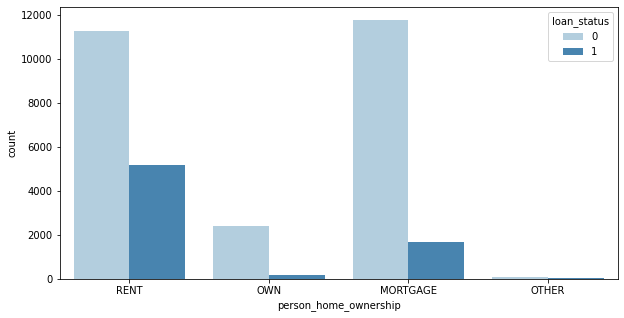

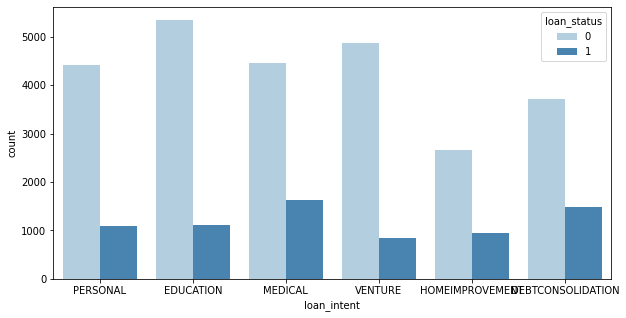

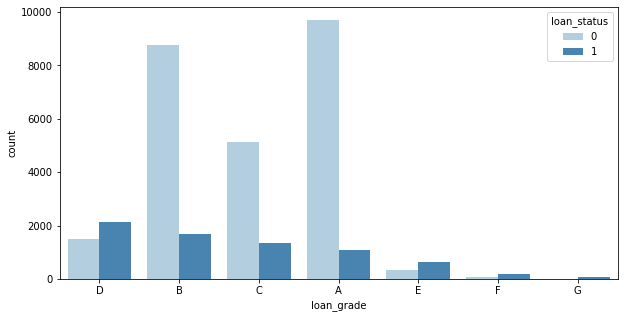

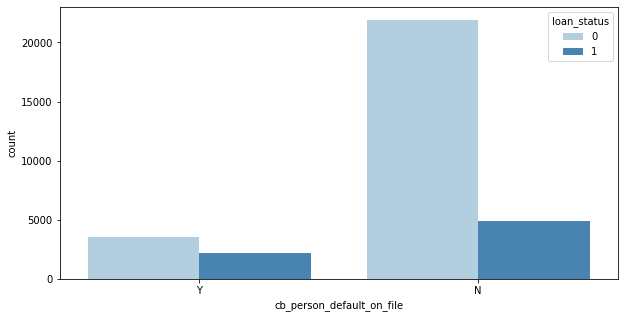

In [ ]:
for cat in cr_df.drop('loan_status', axis=1).select_dtypes(include='O'):
  sns.countplot(hue=cr_df.loan_status, x=cr_df[cat], palette='Blues')
  plt.show()

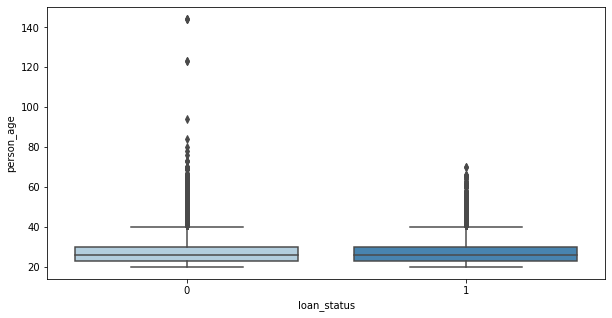

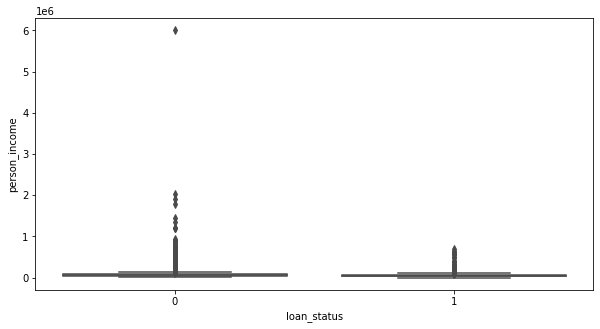

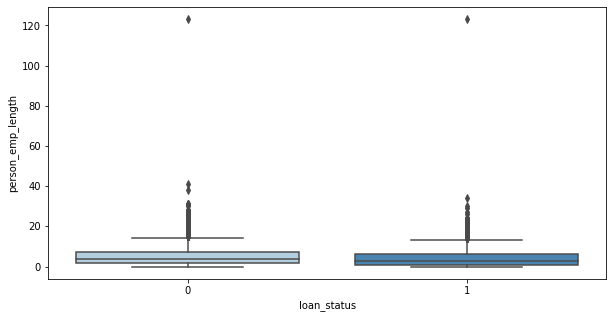

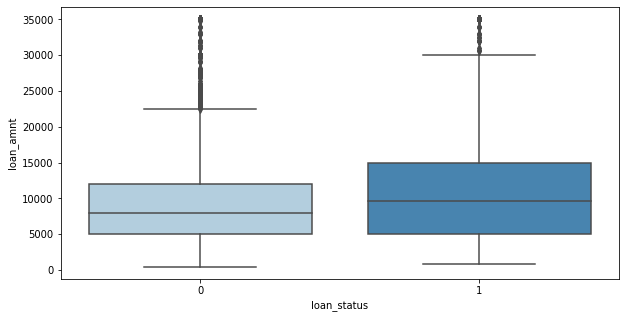

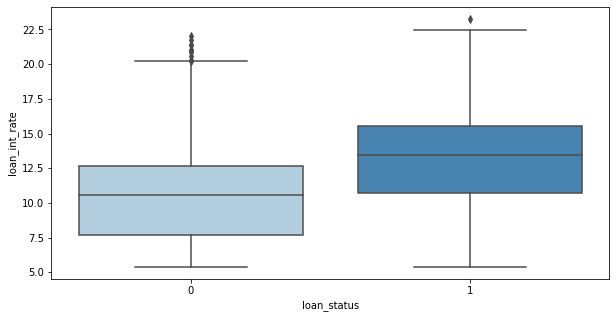

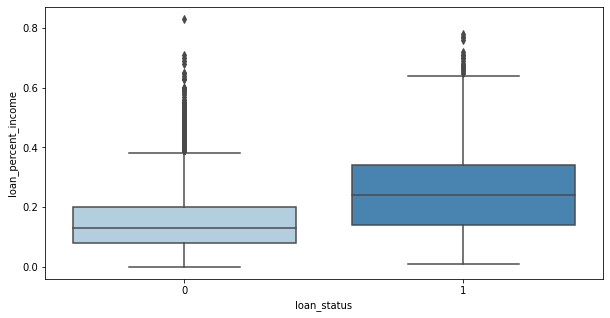

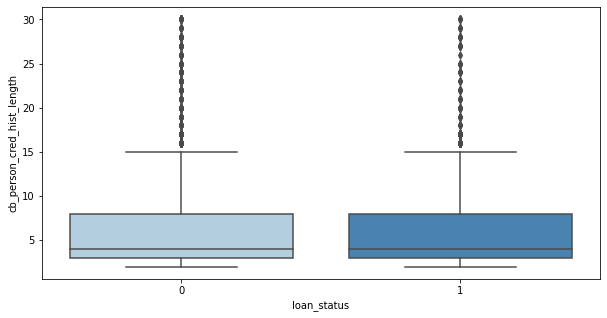

In [ ]:
# BOX PLOTS FOR DIFFERENCE IN NUMERICAL VARIABLES
for cat in cr_df.drop('loan_status', axis=1).select_dtypes(exclude='O'):
  sns.boxplot(x=cr_df.loan_status, y=cr_df[cat], palette='Blues')
  plt.show()


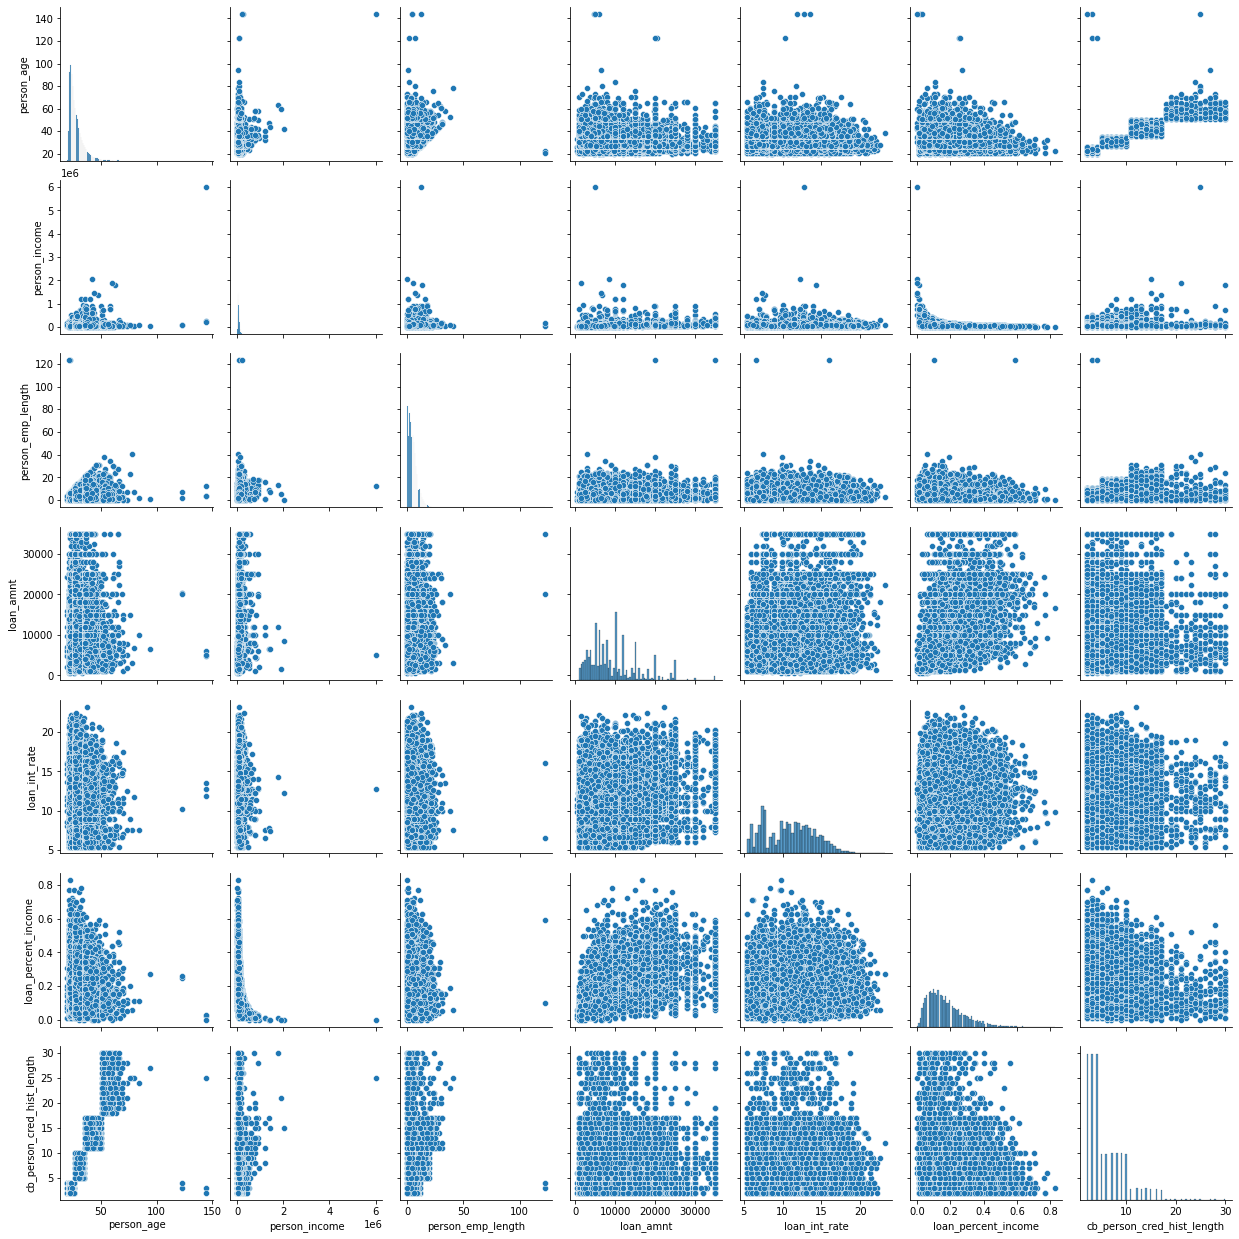

In [ ]:
df_num = cr_df.drop('loan_status', axis=1).select_dtypes(exclude='O')
sns.pairplot(df_num);

### Observations
* **Outliers** shown in all plots need to be removed
  * From the boxplots and scatterplots, the outliers are:
    * **person_age** > 100
    * **person_income** > 4
    * **person_emp_length** > 100

* **Missing values** can be filled since its a small amount

### Outliers
* Since OLS is try to minimise sum or squared errors, any single outliers can negatively impact the model significantly

In [ ]:
outliers_index = cr_df[(cr_df.person_age > 100) | (cr_df.person_income > 4000000) | (cr_df.person_emp_length > 100)].index

cr_loan_new = cr_df.drop(outliers_index)

In [ ]:
# df_num = cr_loan_new.drop('loan_status', axis=1).select_dtypes(exclude='O')
# sns.pairplot(df_num);

### Missing Data

In [ ]:
(cr_loan_new.isna().sum()/len(cr_loan_new)).sort_values(ascending=False)
# Decide to fill the small amount of missing data 

loan_int_rate                 0.095628
person_emp_length             0.027476
person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

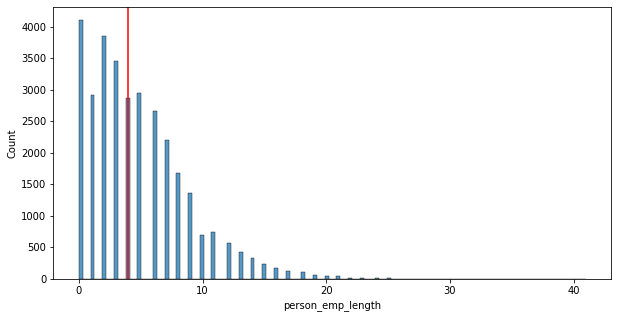

In [ ]:
sns.histplot(x=cr_loan_new.person_emp_length)
plt.axvline(x=cr_loan_new.person_emp_length.median(), color='red')
plt.show()

In [ ]:
# Since postively skewed, we fillna() with the median
cr_loan_new.person_emp_length.fillna(cr_loan_new.person_emp_length.median(), inplace=True)

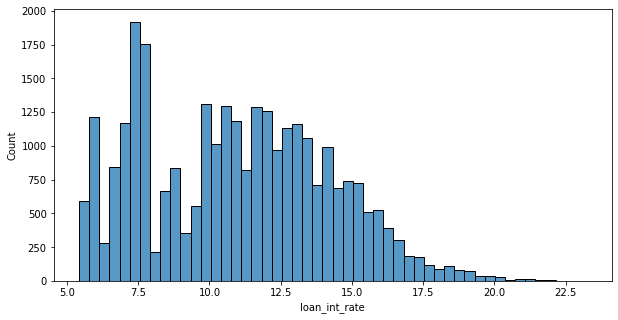

In [ ]:
sns.histplot(x=cr_loan_new.loan_int_rate)
plt.show()

In [ ]:
# Will drop missing data in loan_int_rate, since its abit bimodal distributed
# Also only a small amount are missing, so wont hurt the model
cr_loan_clean = cr_loan_new.dropna()
cr_loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29459 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  29459 non-null  int64  
 1   person_income               29459 non-null  int64  
 2   person_home_ownership       29459 non-null  object 
 3   person_emp_length           29459 non-null  float64
 4   loan_intent                 29459 non-null  object 
 5   loan_grade                  29459 non-null  object 
 6   loan_amnt                   29459 non-null  int64  
 7   loan_int_rate               29459 non-null  float64
 8   loan_status                 29459 non-null  int64  
 9   loan_percent_income         29459 non-null  float64
 10  cb_person_default_on_file   29459 non-null  object 
 11  cb_person_cred_hist_length  29459 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.9+ MB


## **Logistic Regression for Defaults**
* **Probability of default** between 0 and 1
* `loan_status` of `1` is a default or `0` for non-default
* The closer to 1, the higher probability of default
* The model is a classification model (default, non-default)
* **Two most common models:**
  * Logistic regression
  * Decision tree

### Train and Test

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Define X and y
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=123)

In [ ]:
# Create and fit lgm
lgm = LogisticRegression()

lgm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Coefficients
print('Coefficients: ', lgm.coef_)
print('Intercept: ', lgm.intercept_)

Coefficients:  [[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]
Intercept:  [-3.30582292e-10]


### Interpreting coefficients
Example:

**Intercept** = -1.02

**Coefficient for employment length** = -0.056 

* The coefficient tells us the log odds for non-default.
* For 1 unit (year) increase in **employment length**, the person is **less likely to default by 0.056 or 5.6%**
* Example, if **person_emp_length** is 12, the **probability of default is `12 * -0.06` = .15**


### Dummy Codes

In [ ]:
cr_loan_prep = pd.get_dummies(cr_loan_clean, drop_first=True)
cr_loan_prep.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,1,...,0,0,1,0,0,0,0,0,0,0


### Train and Test

In [ ]:
X = cr_loan_prep.drop('loan_status',axis=1)
y = cr_loan_prep.loan_status

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [ ]:
# Create and fit lgm
lgm = LogisticRegression().fit(X_train, y_train)

# Create prediction 
preds = lgm.predict_proba(X_test)

### Define Default Threshold
Need to decide what probability range is a default, and what is a non-default

* Simple way is:
  * anything **< 0.05 is non-default**

  * anything **> 0.05 is default**


Then need to **relabel loans based on our threshold of 0.5**

In [ ]:
# Get probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns=['prob_default'])
preds_df.head()

,prob_default
0,0.449085
1,0.223920
2,0.290365
3,0.169361
4,0.113098


In [ ]:
# Reassign as 1 or 0 using 0.5 as default threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)
preds_df.loan_status.value_counts()

0    9185
1     537
Name: loan_status, dtype: int64

### Model accuracy scoring
* Calculate accuracy

  $Accuracy = \frac{numer of correct predictions}{numer of predictions}$



In [ ]:
from sklearn import metrics


In [ ]:
# Check accuracy against test data
print(metrics.classification_report(y_test, preds_df.loan_status, target_names=['Non-default', 'Default']))


# The recall for defaults is 0.18 meaning 18% of our true defaults were predicted correctly.

              precision    recall  f1-score   support

 Non-default       0.81      0.98      0.89      7603
     Default       0.72      0.18      0.29      2119

    accuracy                           0.81      9722
   macro avg       0.76      0.58      0.59      9722
weighted avg       0.79      0.81      0.76      9722



### Visually scoring credit models: ROC
**Receiver Operating Characteristic curve**
* Plots true positive rate (sensitivity) against false positive rate (fall-out)
* The % of correctly predicted defaults, against % incorrectly predicted defaults


`fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity)`

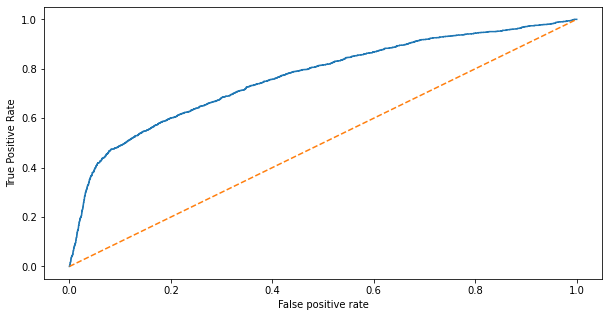

In [ ]:
# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = metrics.roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True Positive Rate')
plt.show()

# Compute the AUC and store it in a variable
auc = metrics.roc_auc_score(y_test, prob_default)

### Optimal Threshold and Confusion Matrices
**The recall for defaults was 0.18 meaning 18% of our true defaults were predicted correctly.**

$Recall(0) = \frac{TN}{TN + FP}$

$Recall(1) = \frac{TP}{TP + FN}$



**Confusion Matrix** shows the TN TP by FN TP



In [ ]:
preds_df.loan_status = preds_df.prob_default.apply(lambda x: 1 if x > 0.5 else 0)

print('Confusion Matrix with 0.5 threshold')
print(metrics.confusion_matrix(y_test, preds_df.loan_status))


preds_df.loan_status = preds_df.prob_default.apply(lambda x: 1 if x > 0.4 else 0)

print('Confusion Matrix with 0.4 threshold')
print(metrics.confusion_matrix(y_test, preds_df.loan_status))

Confusion Matrix with 0.5 threshold
[[7451  152]
 [1734  385]]
Confusion Matrix with 0.4 threshold
[[6990  613]
 [1125  994]]


# **2. Credit Card Default Classifier**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


In [ ]:
# Find if the person will default given (Student or not, Balance, and Income)

# Dataset from: Pedram Jahangiry's class
df = pd.read_csv('https://raw.githubusercontent.com/PJalgotrader/ML-USU-SP21/main/Classes/Class%2011-%20Logistic%20regression%20(Python)/Default.csv')

In [ ]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [ ]:
df.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [ ]:
# Check if target variable is imabalnced:

# rows=, cols=
pd.crosstab(df.default, df.default, normalize='all')*100

# DATA IS EXTREMELY IMBALANCED. 

default,No,Yes
default,,
No,96.67,0.00
Yes,0.00,3.33


**DATA IS EXTREMELY IMBALANCED.**
* Accuracy is high here, but misleading so dont rely on this metric


## Data preprocessing

In [ ]:
df.isna().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [ ]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [ ]:
df.describe()

,balance,income,default_Yes,student_Yes
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,835.374886,33516.981876,0.033300,0.294400
std,483.714985,13336.639563,0.179428,0.455795
min,0.000000,771.967729,0.000000,0.000000
25%,481.731105,21340.462905,0.000000,0.000000
50%,823.636973,34552.644800,0.000000,0.000000
75%,1166.308387,43807.729275,0.000000,1.000000
max,2654.322576,73554.233500,1.000000,1.000000


## Defining variables and splitting data
* For logistic regression - dont need to scale
* Because not calculating distance, not comparing
* **For KNN - distance based** we MUST standardize

In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
y = df.default_Yes 
X = df.drop('default_Yes', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_train.head()

,balance,income,student_Yes
8369,1491.707545,40637.44798,0
9722,713.559839,24324.14394,1
6950,676.652720,31741.43106,0
1919,595.065973,29842.88605,0
5713,1719.169241,57866.05876,0


## Logistic regression with Sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# initiate and fit on Training set
lgm = LogisticRegression()
lgm.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# prediction
y_hat = lgm.predict(X_test) # these are 1,0 binary

In [ ]:
# But we want Probability so we can define threshold
y_hat_probs = lgm.predict_proba(X_test)[:,1]

In [ ]:
np.round(lgm.predict_proba(X_test),3)

array([[0.706, 0.294],
       [0.995, 0.005],
       [0.977, 0.023],
       ...,
       [1.   , 0.   ],
       [0.997, 0.003],
       [0.924, 0.076]])

In [ ]:
np.max(y_hat_probs)

0.8846408039061281

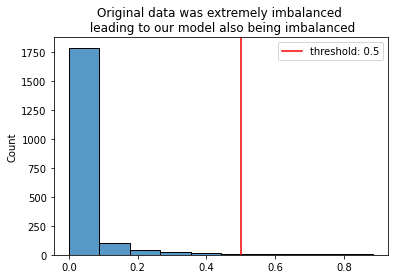

In [ ]:
plt.axvline(x=0.5, color='r', label='threshold: 0.5')
plt.legend()
sns.histplot(y_hat_probs, bins=10).set(title='Original data was extremely imbalanced \n leading to our model also being imbalanced');


If we use default threshold of 0.5, this is a poor model
* highly imblaanced
* its saying almost everything is **NOT Default**
* this generates **too many false negative**
* so one way is to be more strict with our threshold

In [ ]:
# Define our thresholds
y_hat_10 = np.where(y_hat_probs > 0.10, 1, 0)
y_hat_30 = np.where(y_hat_probs > 0.30, 1, 0)

In [ ]:
df_predictions = pd.DataFrame({'y_test': y_test, 'y_hat_probs': y_hat_probs,
                               'y_hat_10': y_hat_10, 'y_hat_30': y_hat_30})

# New columns classified by Threshold .10, and .30
df_predictions.head()

,y_test,y_hat_probs,y_hat_10,y_hat_30
8018,0,0.294225,1,0
9225,0,0.004814,0,0
3854,0,0.022671,0,0
2029,0,0.005872,0,0
3539,0,0.103683,1,0


Using 0.10 threshold which is very strict, the model predicted 8018 person to default, but he actually didnt.
- Intuitive because threshold was lowered so it increases more false positive

## Performance metrics:

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

### Confusion matrix

In [ ]:
print(confusion_matrix(y_test, y_hat))

[[1924   11]
 [  56    9]]


In [ ]:
# accuracy:
(1924 + 9) / (1924+11+56+9)

0.9665

In [ ]:
# Precision
print('precision of 1: ', 9 / (9+11))
print('precision of 0: ', 1924 / (1924+56))

precision of 1:  0.45
precision of 0:  0.9717171717171718


In [ ]:
# Recall 
print('Recall of 1: ', 9 / (56+9))
print('Recall of 0: ', 1924/ (1924+11))

Recall of 1:  0.13846153846153847
Recall of 0:  0.9943152454780362


In [ ]:
# F1
2* .45*.14 /(.45+.14)

0.21355932203389832

### Built-in classification report

In [ ]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1935
           1       0.45      0.14      0.21        65

    accuracy                           0.97      2000
   macro avg       0.71      0.57      0.60      2000
weighted avg       0.95      0.97      0.96      2000



**In practice just focus on class: 1**

**Focus on Positive (1) prediction**
* because the point of the model is to predict 1 or 0. 
* Example, pass COIVD test?, Buy stocks?

**Support** - number of observatiosn used to calculate the performacne metrix
* 1935 observations were 0 and these were used to calculate metrix




In [ ]:
def logistic_report(X_train, y_train, X_test,y_test, threshold=0.5):
    logistic= LogisticRegression()
    logistic.fit(X_train, y_train)
    probs = logistic.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,2)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    tn = cm[0,0]
    fn = cm[1,0]
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled, tn, fn

In [ ]:
logistic_report(X_train, y_train, X_test,y_test, threshold=0.5)

-----------------------------------------
Accuracy  = 0.97
Precision = 0.45
Recall    = 0.14
f1_score  = 0.21
-----------------------------------------


(                    Predict : negative  Predict :positive 
 Actual : negative                 1924                  11
 Actual : positive                   56                   9, 1924, 56)

**Application**: If as a lending company, your profit is defined as below:

$(TN * V) - (FN * 4V)$
* where V=constant dollar amount, 
* then which threshold will maximize your profit?

In [ ]:
def profit(tn, fn):
  return tn-4*fn

In [ ]:
for x in np.arange(0,1,0.1):

  logistic= LogisticRegression()
  logistic.fit(X_train, y_train)
  probs = logistic.predict_proba(X_test)[:,1]
  y_hat = np.where(probs>=x,1,0)
  
  cm = confusion_matrix(y_test, y_hat)

  tn = cm[0,0]
  fn = cm[1,0]
  print('Threshold: ',round(x,2), 'Profit: ', profit(tn,fn))

Threshold:  0.0 Profit:  0
Threshold:  0.1 Profit:  1665
Threshold:  0.2 Profit:  1709
Threshold:  0.3 Profit:  1727
Threshold:  0.4 Profit:  1718
Threshold:  0.5 Profit:  1700
Threshold:  0.6 Profit:  1687
Threshold:  0.7 Profit:  1688
Threshold:  0.8 Profit:  1682
Threshold:  0.9 Profit:  1675


# **3. Titanic Survivability**

* Predict a classification: survived or deceased
* Implement Logistic Regression in Python for classification

In [ ]:
import pandas as pd
import numpy as np

from scipy.stats import stats, kurtosis, skew
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.info()
# theres missing data!
# needs dummy codes for True, False 
# Survived is the target
# Lots of categorical data so ANOVA, t-tests will be used alot

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## EDA

### Countplot of Dependent Variable

In [ ]:
titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [ ]:
titanic.survived.value_counts()/len(titanic.survived)
# so only 38% reportedly survived

0    0.616162
1    0.383838
Name: survived, dtype: float64

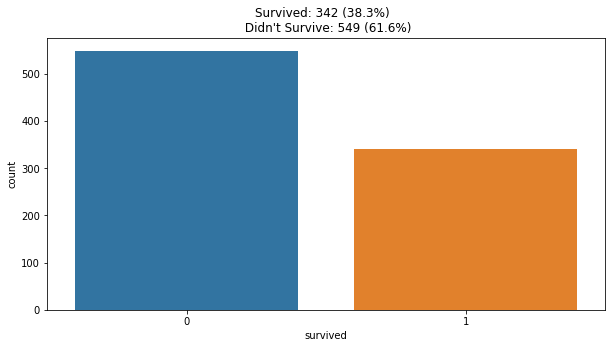

In [ ]:
plt.title("Survived: 342 (38.3%)  \n Didn't Survive: 549 (61.6%)")
sns.countplot(x=titanic.survived);

### Missing Data

In [ ]:
(titanic.isnull().sum()/len(titanic)).sort_values(ascending=False)

# Will drop `deck` since its 77% missing data
# Needa analyse Age so see how we can fill in missing data

deck           0.772166
age            0.198653
embarked       0.002245
embark_town    0.002245
survived       0.000000
pclass         0.000000
sex            0.000000
sibsp          0.000000
parch          0.000000
fare           0.000000
class          0.000000
who            0.000000
adult_male     0.000000
alive          0.000000
alone          0.000000
dtype: float64

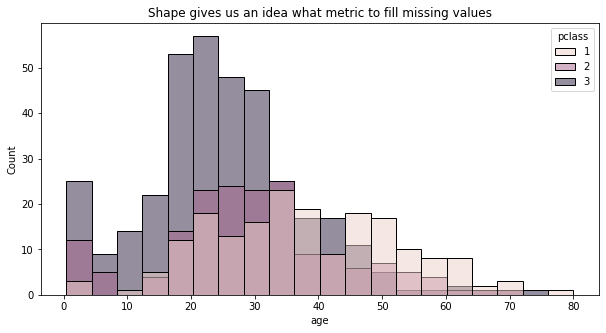

In [ ]:
# Need to analyse age to understand how to fill the missing data
plt.title('Shape gives us an idea what metric to fill missing values')
sns.histplot(data=titanic.dropna(),
             x=titanic.age.dropna(),
             hue=titanic.pclass);

In [ ]:
# Age is a little skewed so we would use Median.
for i in titanic.dropna().groupby('pclass')['age'].apply(list):
  print('Skewness: ', round(stats.skew(i),3), 'Kurtosis: ', stats.kurtosis(skew(i)))

Skewness:  0.105 Kurtosis:  -3.0
Skewness:  -0.173 Kurtosis:  -3.0
Skewness:  -0.191 Kurtosis:  -3.0


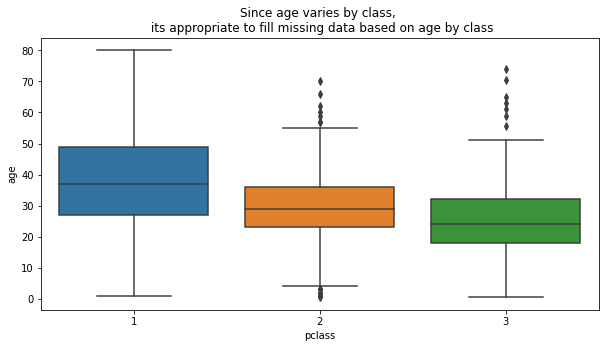

In [ ]:
plt.title('Since age varies by class, \n its appropriate to fill missing data based on age by class')
sns.boxplot(x=titanic.pclass, y=titanic.age);

In [ ]:
titanic.groupby('pclass')['age'].median()

pclass
1    37.0
2    29.0
3    24.0
Name: age, dtype: float64

### Data Cleaning
* Age has 20% missing data. How to fill?
  * Age varies by class
  * Age slightly skewed
  * Solution: **Fill with median of respective class**

* Deck has 77% missing data.
  * Drop data

In [ ]:
# calculate median(age) by class 

# pclass 1: 37
# pclass 2: 29
# pclass 3: 24
def impute_age(col):
  age = col[0]
  pclass = col[1]

  if pd.isnull(age):
    if pclass == 1:
      return 37
    elif pclass == 2:
      return 29
    else:
      return 24
  else:
    return age


In [ ]:
titanic.age = titanic[['age', 'pclass']].apply(impute_age, axis=1)
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
# Duplicate: pclass = class, we should drop `class`
# also drop: adult_male, emark_town, alive, alone, who. Since these are reptitive data
titanic = titanic.drop(['deck', 'embark_town', 'class', 'who', 'adult_male', 'alive', 'alone'], axis=1)
print('Dropped repetitive columns: class, emark_town, who, adult_male, alive, alone')

Dropped repetitive columns: class, emark_town, who, adult_male, alive, alone


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Dealing with Categoricals
* Dummy codes

In [ ]:
titanic.info()
# sex, embarked needs to be dummy codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
titanic = pd.get_dummies(titanic, columns=['sex', 'embarked'], drop_first=True)

In [ ]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = titanic.survived 
X = titanic.drop('survived', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Training/Prediction

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lgm = LogisticRegression()
lgm.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
predictions = lgm.predict(X_test)

### Evaluation

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       175
           1       0.80      0.73      0.77       120

    accuracy                           0.82       295
   macro avg       0.81      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295



- Feature engineering in the future,
- About 82% of finding everyone
- Look for other information

# **4. Advertisment Clicks**
From Markum Reed's github

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/markumreed/data_science_for_everyone/main/machine_learning_python/data/advertising.csv')

In [ ]:
df.columns = [x.lower().replace(' ', '_') for x in df.columns]
df.head()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,ad_topic_line,city,male,country,timestamp,clicked_on_ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df.info()

# Target is 'clicked_on_ad'
# No missing data. GOOD!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   daily_time_spent_on_site  1000 non-null   float64
 1   age                       1000 non-null   int64  
 2   area_income               1000 non-null   float64
 3   daily_internet_usage      1000 non-null   float64
 4   ad_topic_line             1000 non-null   object 
 5   city                      1000 non-null   object 
 6   male                      1000 non-null   int64  
 7   country                   1000 non-null   object 
 8   timestamp                 1000 non-null   object 
 9   clicked_on_ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## EDA

0    500
1    500
Name: clicked_on_ad, dtype: int64


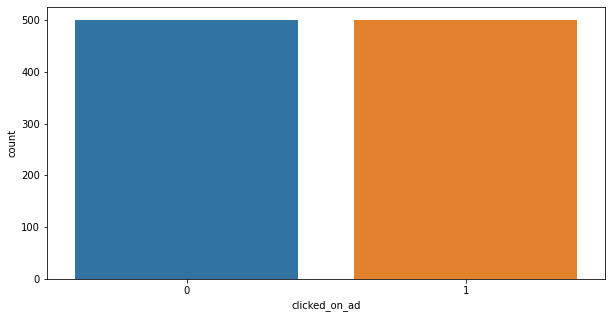

In [ ]:
# Plot our dependent variable
sns.countplot(x=df.clicked_on_ad);

print(df.clicked_on_ad.value_counts())

In [ ]:
df.describe()

,daily_time_spent_on_site,age,area_income,daily_internet_usage,male,clicked_on_ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


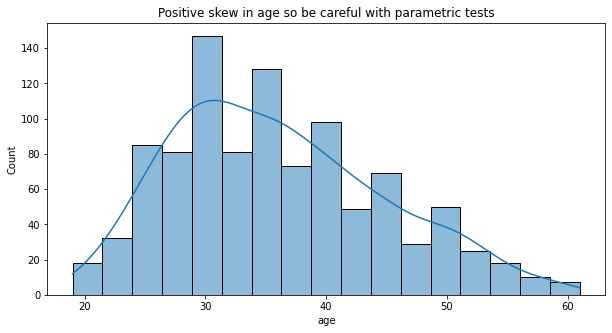

In [ ]:
plt.title('Positive skew in age so be careful with parametric tests')
sns.histplot(x=df.age, kde=True);

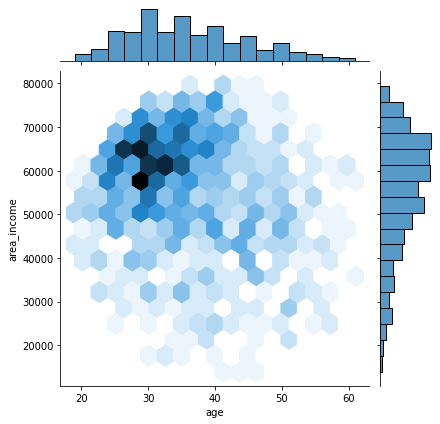

In [ ]:
sns.jointplot(x=df.age, y=df.area_income, kind='hex');

# Most observations lie around 30-40 age and 50k-80k

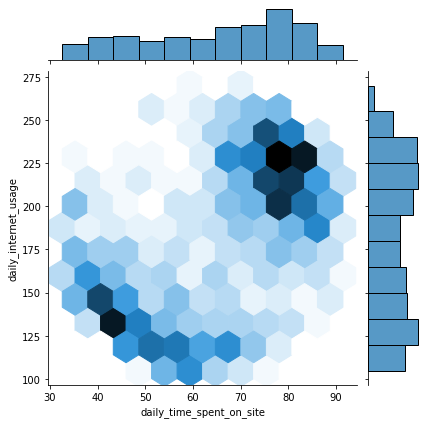

In [ ]:
sns.jointplot(x=df.daily_time_spent_on_site, y= df.daily_internet_usage, kind='hex');

# MASSIVE CLUSTER
# interesting to analyse these 2 groups of internet usage
# why would this happen?
# they're both bimodal 

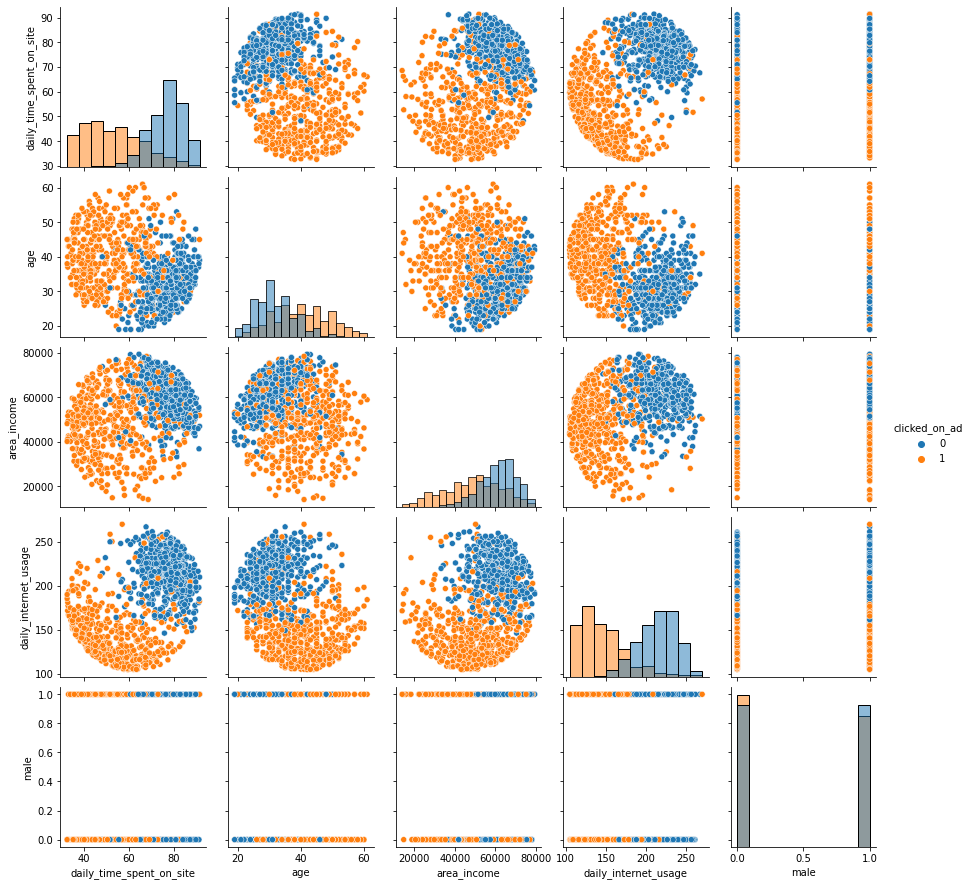

In [ ]:
# Almost no correlation in the groups of 'clicked on ad' or 'not clicked on ad'
# BUT definetely see a split so it may indicate a logistic mdeol may have predicitve power
sns.pairplot(df, hue='clicked_on_ad', diag_kind='hist');

### Observations
* There is a separation in data between clicked and not clicked on ad
* This is good because it indicates theres some pattern in the dependent variable that can be predicted with logistic model
* **daily_internet_usage** histogram shows a clear divverence in the dependent variable.

### ANOVA 
* To further explore the difference

In [ ]:
pd.DataFrame(df.groupby('clicked_on_ad')['daily_internet_usage'].median())

,daily_internet_usage
clicked_on_ad,
0,216.365
1,138.790


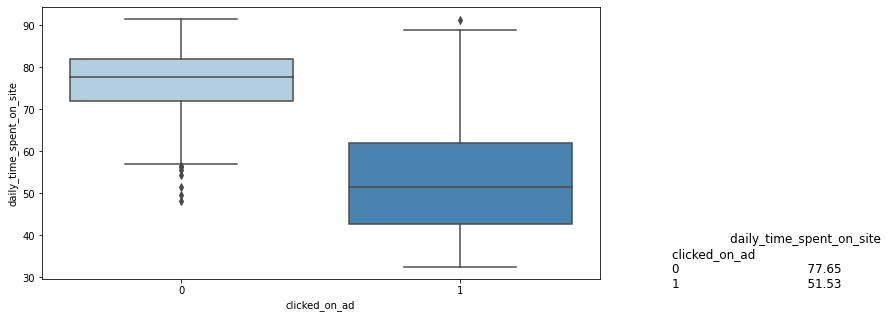

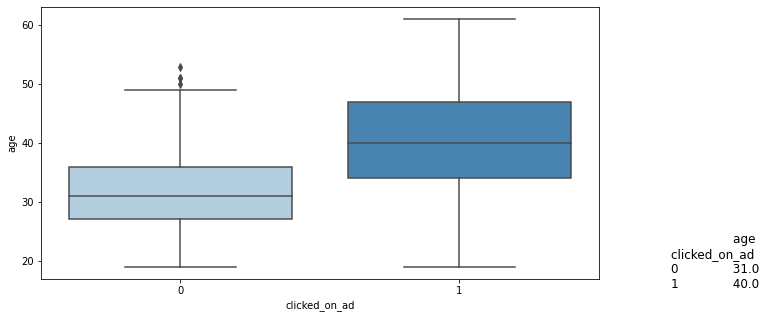

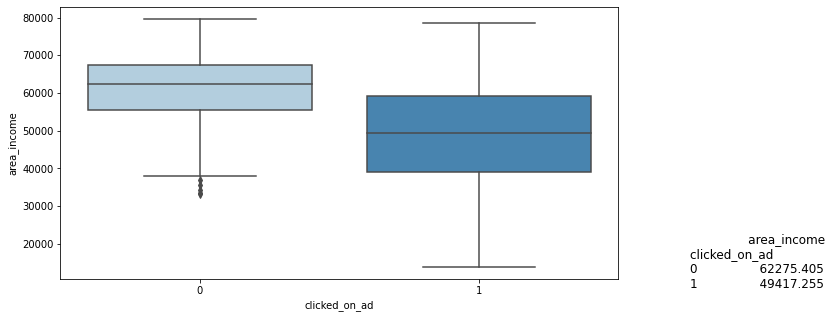

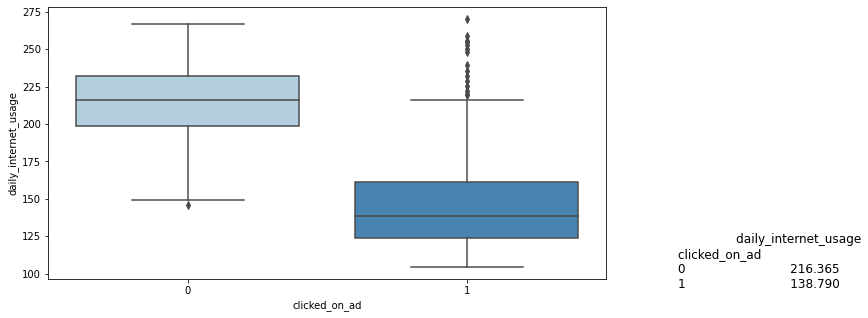

In [ ]:
for col in df.drop(['clicked_on_ad','male'], axis=1).select_dtypes(exclude='O'):  
  textstr = str(pd.DataFrame(df.groupby('clicked_on_ad')[col].median()))

  ax = sns.boxplot(y=df[col], x=df.clicked_on_ad, palette='Blues')
  ax.text(1,0.1, textstr, fontsize=12, transform=plt.gcf().transFigure);
  plt.show()

In [ ]:
anova_output_df = pd.DataFrame(columns = ['f-stat', 'p-value'])

for feature in df.drop(['clicked_on_ad','male'],axis=1).select_dtypes(exclude='O'):

  df1 = df.groupby('clicked_on_ad')[feature].apply(list)
  F,p = stats.f_oneway(*df1)
  
  anova_output_df.loc[feature] = [round(F,3), round(p,6)]

anova_output_df.sort_values('f-stat', ascending=False)

,f-stat,p-value
daily_internet_usage,1618.976,0.0
daily_time_spent_on_site,1268.525,0.0
age,319.643,0.0
area_income,292.771,0.0


### Observations
We can **expect logistic model to have high accuracy** because:

* Boxplot showed differences in groups
* A closer look with ANOVA supported this difference
* Variables are statistically different
* This is good because it indicates these variables can provide good predicitve powers

## Logistic Regression Model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['daily_time_spent_on_site', 'age', 'area_income', 'daily_internet_usage', 'male']]
y = df.clicked_on_ad

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

### Predictions and Model Evaluation

In [ ]:
from sklearn import metrics

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test, predictions))

# Really good fit as expected

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

